# Seattle listings - Exploratory Data Analysis

## Goal
* Draw informative conclusions about the correlations between categorical and numeric features

## Data
* Preprocessed Seattle listings data
    
## Questions  
* How many listings are registered in the different neighbourhoods?
* How and by how much the prices and cleaning fees vary in the different neighbourhoods?
* How and by how much the prices and cleaning fees vary for the different property types?
* How and by how much the prices and cleaning fees vary for the different room types?

## Methods
* Customarized functions from my_function (cat_counts, stats_description)
* Use numpy and pandas built-in functions
* Visualise the resuts in tables,plots and pie charts

## Requirements
* If not yet installed, install _ipynb_ to use the customarized functions in the notebook

# Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from folium.plugins import HeatMap
import numpy as np
%matplotlib inline

In [2]:
#If you have not yet installed ipynb,uncomment the line below first
#!pip install ipynb
# Import customarized functions from my_functions notebook
from ipynb.fs.full.my_functions import cat_counts
from ipynb.fs.full.my_functions import stats_description

# Import dataframe

In [3]:
# import preprocessed data to dataframes
df = pd.read_pickle('Seattle_data/clean_lisitings.pkl')

# Statistical summary

In [4]:
# Statistical summary about the relevant numeric columns
# I use the built in "describe" function to get the statistical summary of the relevant numeric columns.
# I exclude the irrelevant columns ['id','scrape_id','host_id','latitude','longitude']

df.drop(['id','scrape_id','host_id','latitude','longitude'],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
host_response_rate,3816.0,95.584906,11.165601,17.00,100.00,100.000000,100.000000,100.00
host_acceptance_rate,3816.0,99.973795,1.618810,0.00,100.00,100.000000,100.000000,100.00
host_listings_count,3816.0,7.157757,28.628149,1.00,1.00,1.000000,3.000000,502.00
host_total_listings_count,3816.0,7.157757,28.628149,1.00,1.00,1.000000,3.000000,502.00
accommodates,3816.0,3.350105,1.977876,1.00,2.00,3.000000,4.000000,16.00
bathrooms,3800.0,1.259605,0.590494,0.00,1.00,1.000000,1.000000,8.00
bedrooms,3810.0,1.308136,0.883359,0.00,1.00,1.000000,2.000000,7.00
beds,3815.0,1.735780,1.139654,1.00,1.00,1.000000,2.000000,15.00
price,3816.0,127.723198,89.139353,20.00,75.00,100.000000,150.000000,999.00
security_deposit,3816.0,254.484832,103.203514,95.00,250.00,254.484832,254.484832,995.00


# Correlation among the numeric features

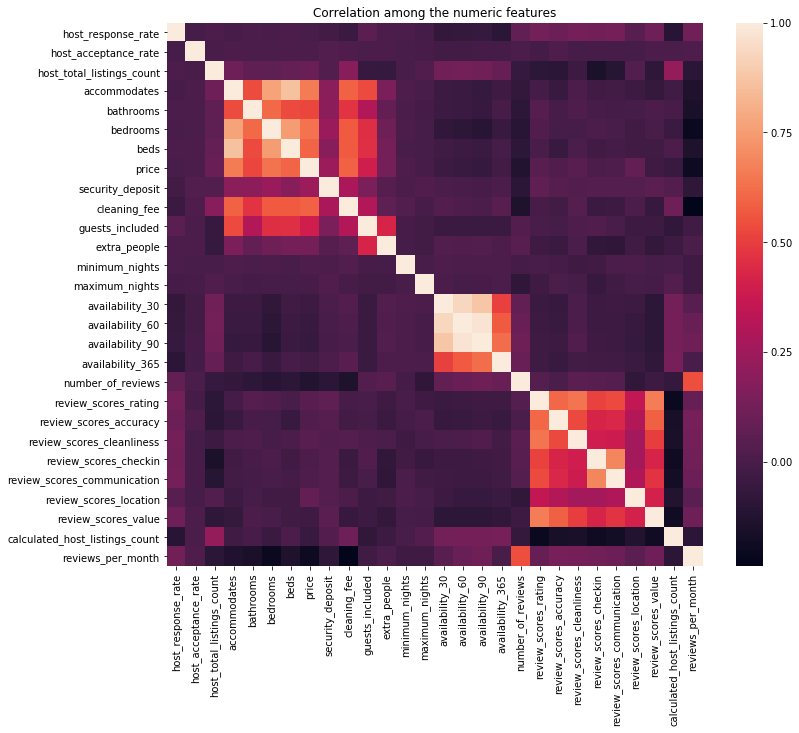

In [5]:
# Get the correlation of the different numeric columns
# The "corr()" built-in function and the seaborn heatmap are used for the task.

plt.figure(figsize=(12,10))
dff = df.drop(['id','scrape_id','host_id','latitude','longitude','host_listings_count'],axis=1)
ax = sns.heatmap(dff.corr());
plt.title('Correlation among the numeric features');

### Findings
* Based on the heatmap, there are 3 clusters of correlations in the Seattle listings data.
* We see a fairly strong correlation among the scores and reviews (lower_right corner of the heatmap)
* There is a strong correlation among the availability measures which is expected since they are cummulative(centre)
* There is a fairly strong correlation among the fees, prices and room specifics (upper left corner)

# Descriptive Statistics 

## Neighbourhood & Prices
* Run the function("cat_counts")
* Run the function("stats_description") col1 = neighbourhood_group_cleansed and col2 = price
* Visualise the results (count, bar and box plots)

### Counts and percentage shares

In [6]:
# The counts and shares of listings in the different neighbourhoods.
cat_counts(df,"neighbourhood_group_cleansed")

,neighbourhood_group_cleansed,Count,Perc
0,Other neighborhoods,794,0.208071
1,Capitol Hill,567,0.148585
2,Downtown,528,0.138365
3,Central Area,369,0.096698
4,Queen Anne,295,0.077306
5,Ballard,230,0.060273
6,West Seattle,203,0.053197
7,Rainier Valley,159,0.041667
8,University District,122,0.031971
9,Beacon Hill,118,0.030922


### Descriptive statistics

In [7]:
# Listings' prices in the different neighbourhoods.
stats_description(df,"neighbourhood_group_cleansed",'price')

,mean_price,median_price,std_price,max_price,min_price,5th perc_price,95th perc_price
Ballard,124.682609,95.0,87.925033,475.0,25.0,95.0,350.00
Beacon Hill,94.669492,75.0,61.528682,399.0,30.0,75.0,201.40
Capitol Hill,130.592593,105.0,92.442331,750.0,22.0,105.0,295.00
Cascade,140.101124,115.0,112.179042,775.0,42.0,115.0,280.00
Central Area,128.338753,100.0,80.260558,500.0,35.0,100.0,295.00
Delridge,83.278481,72.0,41.797110,300.0,35.0,72.0,148.20
Downtown,154.329545,139.0,90.947831,999.0,35.0,139.0,300.00
Interbay,109.727273,90.0,60.003485,250.0,50.0,90.0,200.00
Lake City,92.671642,70.0,57.212625,252.0,35.0,70.0,247.00
Magnolia,177.672131,129.0,150.078726,950.0,30.0,129.0,375.00


### Visualize stats

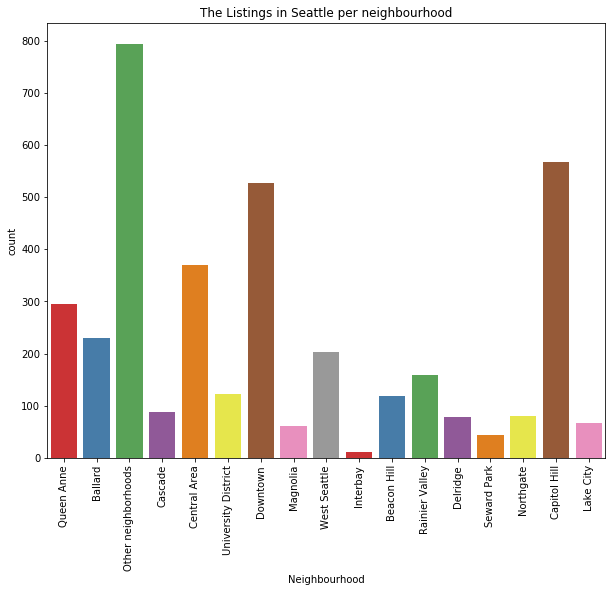

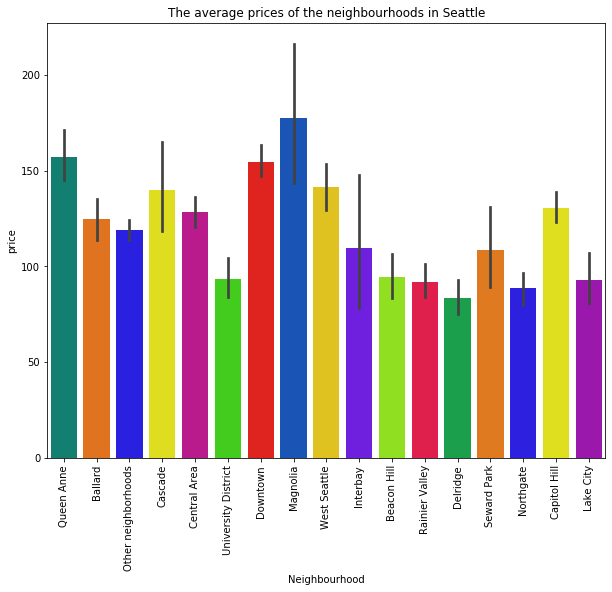

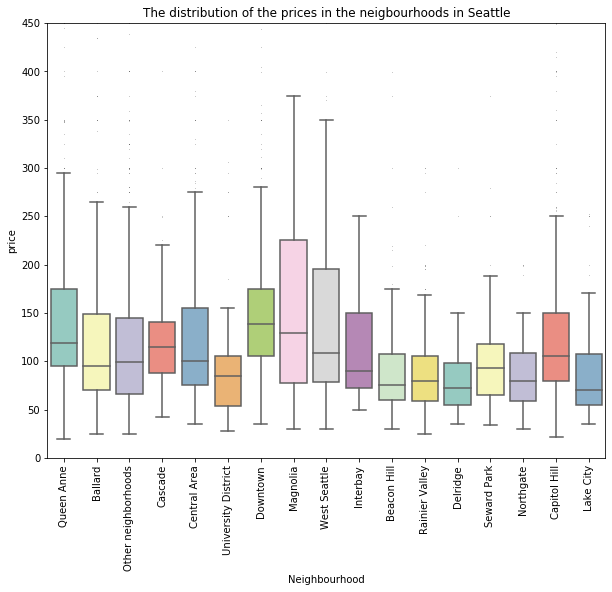

In [8]:
#Countplot
plt.figure(figsize=(10,8))
ax=sns.countplot(x= "neighbourhood_group_cleansed",data=df,palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
plt.title('The Listings in Seattle per neighbourhood')
plt.xlabel('Neighbourhood')
#Barplot    
plt.figure(figsize=(10, 8))
ax = sns.barplot(data = df, x = "neighbourhood_group_cleansed", y = 'price',estimator = np.mean,palette='prism')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Neighbourhood')
#ax.set_ylim(0, 450);
plt.title('The average prices of the neighbourhoods in Seattle');

#Boxplot
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = df, x = "neighbourhood_group_cleansed", y = 'price', fliersize = 0.1,palette='Set3')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 450);
plt.title('The distribution of the prices in the neigbourhoods in Seattle')
plt.xlabel('Neighbourhood');

##### Findings: 
* Capitol Hill and Interbay have the highest(15%) and lowest(0.2%) listings in Seattle respectively
* On average the prices are highest in Magnolia (178) and lowest in Delridge(83)
* In general the prices in Seattle heighbourhoods are unevenly distributed.
* The prices in Seattle are most spread out in Magnolia as seen from the std = 150
* The prices in Seattle are least spread out in Northgate as seen from the std = 38

## Property type & prices
* Run function ("cat_counts") col = Property_type
* Run the function ("stats_description") col1 = Property_type and col2 = price
* Visualise the results (count and box plots)

### Counts and percentage shares

In [9]:
cat_counts(df,"property_type")

,property_type,Count,Perc
0,House,1733,0.454260
1,Apartment,1706,0.447182
2,Townhouse,118,0.030931
3,Condominium,91,0.023853
4,Loft,40,0.010485
5,Bed & Breakfast,37,0.009699
6,Other,22,0.005767
7,Cabin,21,0.005505
8,Camper/RV,13,0.003408
9,Bungalow,13,0.003408


### Descriptive statistics

In [10]:
#  Propert prices in Seattle
stats_description(df,"property_type",'price')

,mean_price,median_price,std_price,max_price,min_price,5th perc_price,95th perc_price
Apartment,122.872216,110.0,66.583144,999.0,20.0,110.0,229.75
Bed & Breakfast,112.054054,99.0,55.840022,299.0,30.0,99.0,207.40
Boat,282.375000,150.0,281.327434,775.0,75.0,150.0,741.75
Bungalow,115.615385,95.0,75.226922,349.0,65.0,95.0,233.20
Cabin,104.666667,95.0,55.218053,300.0,52.0,95.0,210.00
Camper/RV,120.461538,82.0,95.375237,375.0,45.0,82.0,309.00
Chalet,98.500000,98.5,51.618795,135.0,62.0,98.5,131.35
Condominium,151.109890,115.0,111.091099,700.0,50.0,115.0,320.00
Dorm,39.500000,39.5,2.121320,41.0,38.0,39.5,40.85
House,131.848080,95.0,104.823698,975.0,25.0,95.0,350.00


### Visualize stats

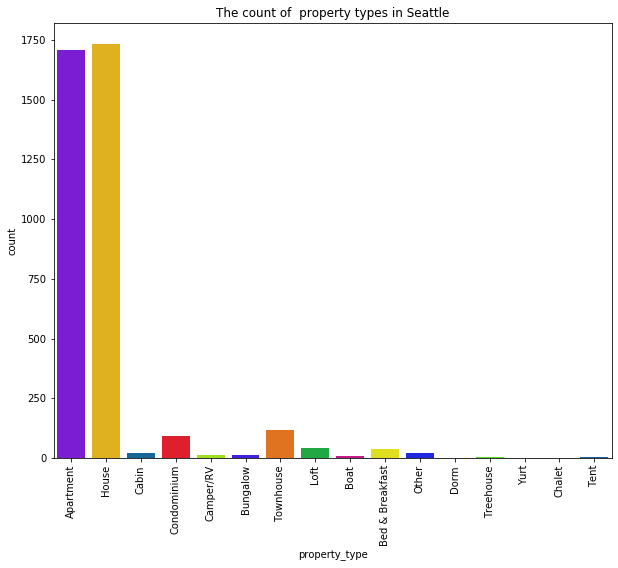

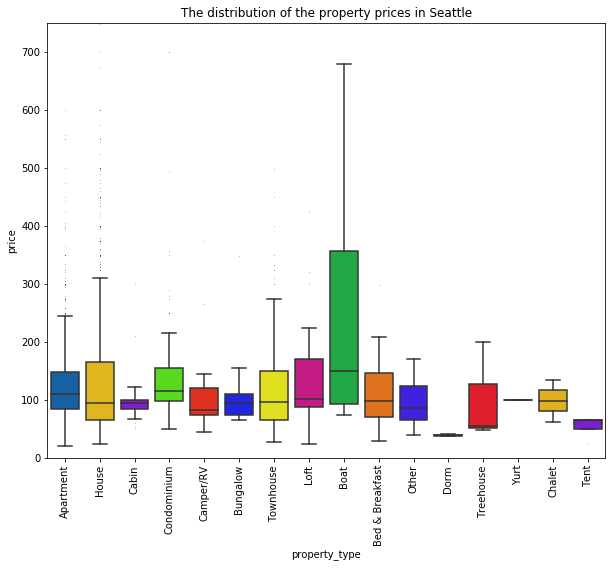

In [11]:
# Countplot
plt.figure(figsize=(10,8))
ax=sns.countplot(x= "property_type",data=df,palette='prism_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
plt.title('The count of  property types in Seattle');

#Box plots
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = df, x = "property_type", y = 'price', fliersize = 0.1,palette='prism')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 750);
plt.title('The distribution of the property prices in Seattle');

#### Findings
* Aproximately 90% of the properties listed in Seattle are apartments and houses
* Yurts,dorms and charlet are the 3 least popular properties in Seattle.
* On avergae, a boat is the most highly priced property in Seattle with an average price 282.
  The prices for boats also have the highest spread (std = 281)
* The appartment prices range from 20 to 999, having the lowest(min) and highest(max)prices among the properties in Seattle.
* The dorm prices are the least spread (std=2) and this is because they also have the lowest counts in the data.

## Property type & Cleaning fee
* Run the function ("stats_description") col1 = Property_type and col2 = cleaning fee
* Visualise the results (box plots)

### Descriptive statistics

In [12]:
#Cleaning fees per property type in Seattle
stats_description(df,"property_type",'cleaning_fee')

,mean_cleaning_fee,median_cleaning_fee,std_cleaning_fee,max_cleaning_fee,min_cleaning_fee,5th perc_cleaning_fee,95th perc_cleaning_fee
Apartment,59.156470,61.724076,33.127956,274.000000,5.000000,61.724076,112.500000
Bed & Breakfast,47.553555,61.724076,18.183196,61.724076,10.000000,61.724076,61.724076
Boat,86.896529,61.724076,82.177101,275.000000,15.000000,61.724076,213.750000
Bungalow,55.167094,50.000000,47.486206,200.000000,12.000000,50.000000,117.034446
Cabin,43.596033,50.000000,21.361015,61.724076,5.000000,50.000000,61.724076
Camper/RV,39.893875,30.000000,19.705183,61.724076,15.000000,30.000000,61.724076
Chalet,30.000000,30.000000,7.071068,35.000000,25.000000,30.000000,34.500000
Condominium,65.579752,61.724076,40.324836,250.000000,5.000000,61.724076,135.000000
Dorm,33.862038,33.862038,39.402872,61.724076,6.000000,33.862038,58.937872
House,65.184574,61.724076,49.360824,300.000000,5.000000,61.724076,160.000000


### Visualize the stats

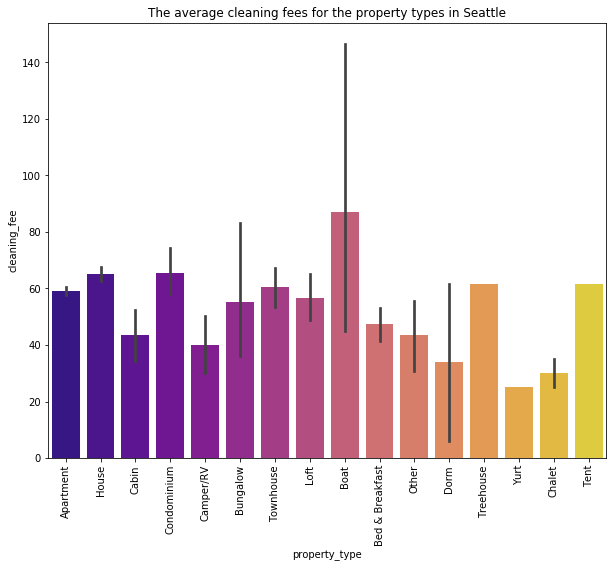

In [13]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data = df, x = "property_type", y = 'cleaning_fee',estimator = np.mean, palette='plasma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('The average cleaning fees for the property types in Seattle');

#### Findings:
* On average a boat is the most expensive property to clean in Seattle with average cleaning price = 87.
* On average a yurt is the least expendive property to clean in Seattle with average cleaning price = 25.
  This is expected based on the kind of property it is.
* The highest cleaning fee paid is 300 for the property type house.
  I can't explain why this house's cleaning cost was this high but maybe the answer can be found in the data.

## Room type & Prices
* Run the function ("cat_counts") = col = Room_type
* Run the function ("stats_description") col1 = Room_type and col2 = price
* Visualize the results (pie-chart)

### Counts and percentage shares

In [14]:
#Count and share of room types in Seattle.
room_type_count = cat_counts(df,"room_type")
room_type_count

,room_type,Count,Perc
0,Entire home/apt,2539,0.665356
1,Private room,1160,0.303983
2,Shared room,117,0.030660


### Descriptive statistics

In [15]:
#Room type prices in Seattle.
stats_description(df,"room_type",'price')

,mean_price,median_price,std_price,max_price,min_price,5th perc_price,95th perc_price
Entire home/apt,155.485121,126.0,95.100584,999.0,39.0,126.0,349.1
Private room,75.044828,69.0,34.603905,399.0,20.0,69.0,139.0
Shared room,47.547009,40.0,19.372704,118.0,22.0,40.0,95.0


### Visualize the stats

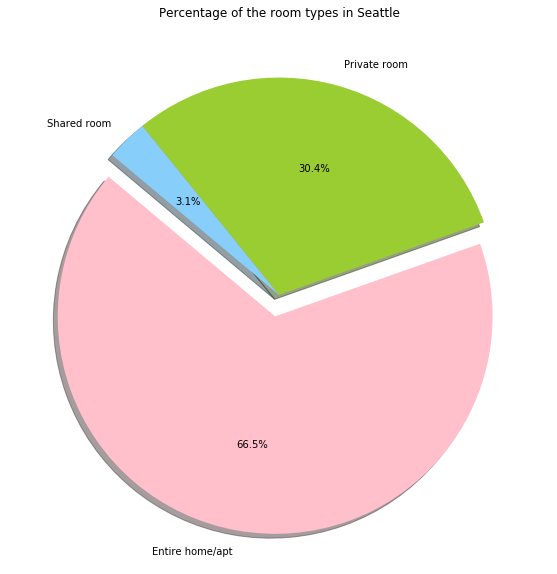

In [16]:
labels = room_type_count['room_type']
sizes = room_type_count['Count']
colors = ['pink', 'yellowgreen','lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

# Pie-chart
plt.figure(figsize=(12,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of the room types in Seattle');

### Findings
* Entire home/apartment take the highest share of room types 66.5% in Seattle
* Shared room have the lowest share 3.1% in Seattle
* Entire home/apartment charged the highest price on average.

## Room type & Cleaning fee
* Run the function ("stats_description") col1 = Room_type and col2 = cleaning fee
* Visualise the results (Bar plot)

### Descriptive statistics

In [17]:
# Cleaning fees per room_type
stats_description(df,"room_type",'cleaning_fee')

,mean_cleaning_fee,median_cleaning_fee,std_cleaning_fee,max_cleaning_fee,min_cleaning_fee,5th perc_cleaning_fee,95th perc_cleaning_fee
Entire home/apt,71.734013,61.724076,45.549743,300.0,5.0,61.724076,159.000000
Private room,41.598398,50.000000,22.191055,150.0,5.0,50.000000,61.724076
Shared room,44.036516,60.000000,20.041334,75.0,5.0,60.000000,61.724076


### Visualize the stats

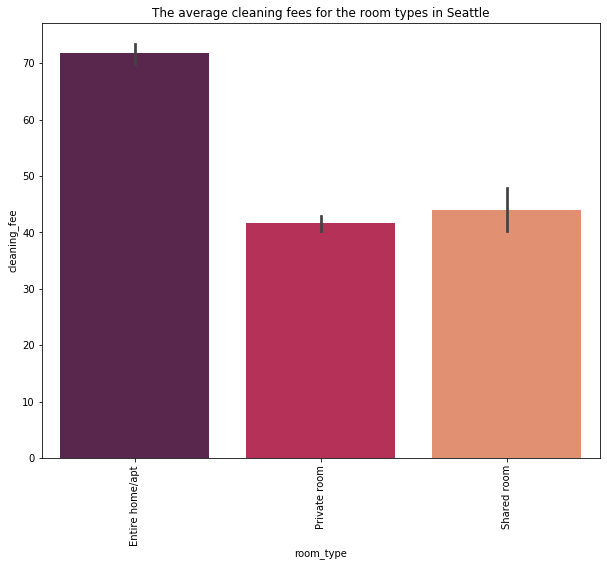

In [18]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data = df, x = "room_type", y = 'cleaning_fee',estimator = np.mean, palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.set_ylim(0, 450);
plt.title('The average cleaning fees for the room types in Seattle');

### Findings
* Entire home/apartment are charged the highest cleaning fee (71.73)
* Cleaning fees for Entire home/apartment have the highest spread (45.5)
* The lowest price one can party for cleaning any room type in Seattle is 5 dollars (min price).
* One pays slightly more for cleaning a shared room than a private room (on average 3.5 difference)

## Cancellation policy & security deposit
* Run the function ("cat_counts") 
* Run the function ("stats_description") col1 = cancellation_policy and col2 = security_deposit
* Visualise the results (pie_chart, barplots)

### counts and percentage share

In [19]:
# The count of cancellation policies
cancellation_policy_count = cat_counts(df,"cancellation_policy")
cancellation_policy_count

,cancellation_policy,Count,Perc
0,strict,1417,0.371331
1,moderate,1250,0.327568
2,flexible,1149,0.301101


### Descriptive statistics

In [20]:
# Security deposit according to the cancellation policy.
stats_description(df,"cancellation_policy",'security_deposit')

,mean_security_deposit,median_security_deposit,std_security_deposit,max_security_deposit,min_security_deposit,5th perc_security_deposit,95th perc_security_deposit
flexible,250.980286,254.484832,73.024425,995.0,95.0,254.484832,300.0
moderate,235.020428,254.484832,96.388133,800.0,95.0,254.484832,427.5
strict,274.496989,254.484832,124.227605,995.0,95.0,254.484832,500.0


### Visualize the stats

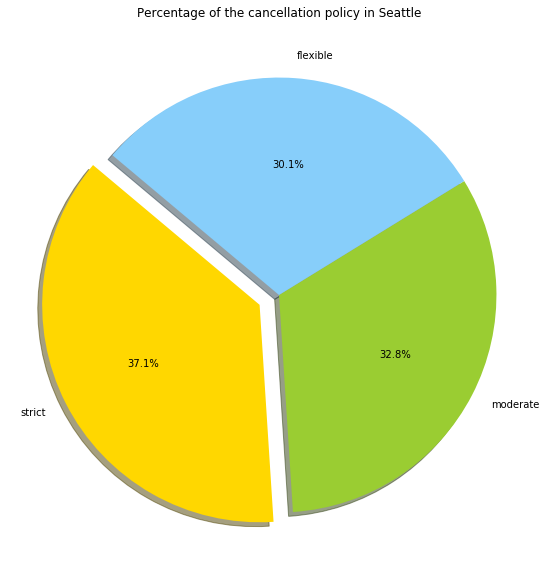

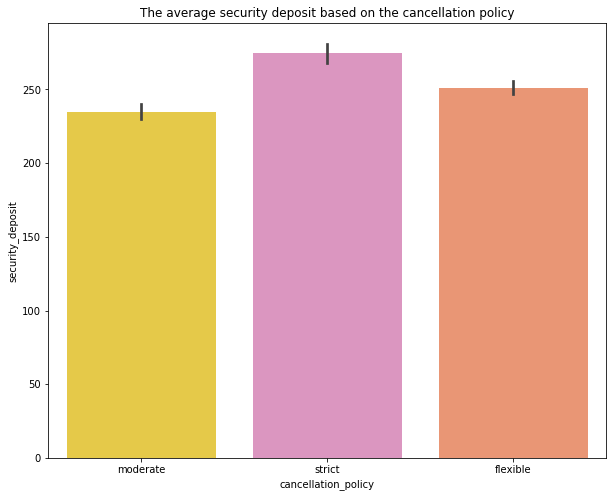

In [21]:
# Define the pie-chart
labels = cancellation_policy_count['cancellation_policy']
sizes = cancellation_policy_count['Count']
colors = ['gold', 'yellowgreen','lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

# Pie chart 
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of the cancellation policy in Seattle');

# Bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='cancellation_policy',y='security_deposit',data=df,palette = "Set2_r");
plt.title('The average security deposit based on the cancellation policy');

### Findings:
* The counts difference among the policies is considerably low.
* There are more hosts who opt for the strict policy compared to the other alternatives.

# Amenities 
* The top amnenities in included in the Seattle property.

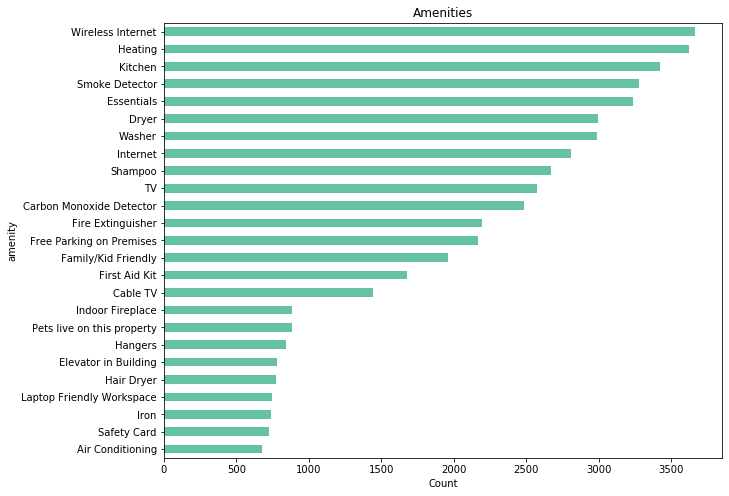

In [22]:
# Strip the rows in the amenities columns into lists.
# Pass the lists into the Counter function
# Create a new dataframe with the amenities and counts
# Plot the data in the new dataframe into a bar plot

from collections import Counter
results = Counter()
df['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

sub_df = pd.DataFrame(results.most_common(25), columns=['amenity', 'count'])
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,8), legend=False,
                                                      title='Amenities',cmap='Set2')
plt.xlabel('Count');

# Host Verfication methods
* The top host verification methods in Seattle.

<Figure size 1080x720 with 0 Axes>

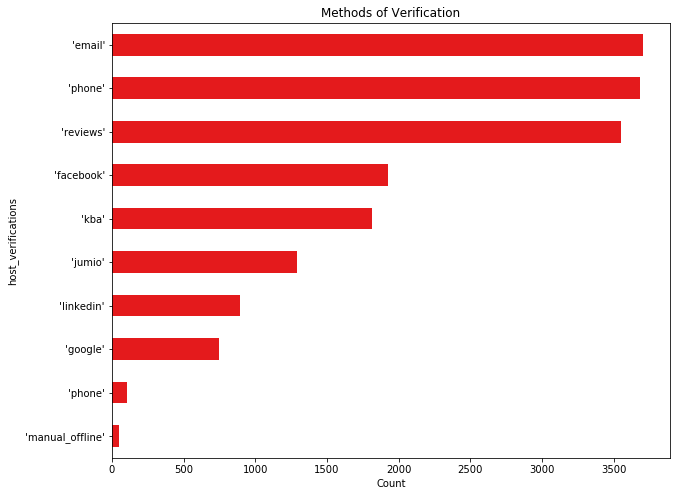

In [23]:
# Strip the rows in the host_verifications columns into lists.
# Pass the lists into the Counter function
# Create a new dataframe with the verifications and counts
# Plot the data in the new dataframe into a bar plot

from collections import Counter
results = Counter()
df['host_verifications'].str.strip('[]')\
               .str.split(',')\
               .apply(results.update)

plt.figure(figsize=(15,10))
ax = pd.DataFrame(results.most_common(10), columns=['host_verifications', 'count'])
ax.sort_values(by=['count'], ascending=True).plot(kind='barh', x='host_verifications', y='count',  
                                                      figsize=(10,8), legend=False,
                                                      title='Methods of Verification',cmap='Set1')
plt.xlabel('Count');